# Titulo del notebook

Descripción y objetivos de este notebook

# Tips para hacer un mejor análisis exploratorio de datos

1. Primero hay que darse cuenta que tenemos **datos numéricos, categóricos y binarios.**

2. Luego de haber hecho una vista gorda de los datos (por ejemplo de los value_counts(), y head()) habría que sacar las **medias, medianas, el desvío estándar, etc.** de todas las variables numéricas que tenemos.

3. Luego de calcular esos atributos, pasamos a la visualización de datos. Noté que en la visualización estás constantemente tratando de buscar correlaciones. Esto no es malo pero tampoco es nuestro único objetivo. Las correlaciones no llegan tan fácilmente, primero hay que profundizar con todos los campos y luego tratar de buscar las correlaciones. **Estas visualizaciones son con una sola variable, acá no comparamos nada**. Te tiro un par de ejemplos de visualizaciones que podes hacer

* **Histogramas
* **Boxplots
* **Gráfico de barras para comparar variables categóricas

4. Luego de una extensa cantidad de visualizaciones de todos los campos, hay que hacer un **análisis bivariado**. Esto es lo que venias haciendo vos con los scatter plots. Pero también te recomiendo comparar con boxplots y gráficos de barras

5. Luego del bivariado viene el **análisis multivariado**, que es lo que hiciste muy bien buscando las correlaciones.

6. Por último vienen las **conclusiones** de esta etapa

7. Cuando termines este proceso, vamos a arrancar a hacer combinaciones con los datos. Por ejemplo, juntar a los de mottivación 2 y compararlos con los que tienen ansiedad 3. Haciendo este tipo de combinaciones encontramos la mayor cantidad de correlaciones.

# Tips para hacer un mejor notebook

DOCUMENTÁ ! No veo que estes escribiendo palabras acá. El notebook tomalo como un lugar para hacer anotaciones y aclaraciones, no solo un lugar donde copias y pegas código. Quiero que describas todos los pasos que haces. Necesito que escribas, y mucho. Esto te ayudará para cuando tengas que escribir el informe.

Por ejemplo, describí lo que hiciste en la eliminación de outliers. Cuando agarré el notebook no sabía donde estaba.

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


%matplotlib inline

## 1. Exploracion general

Descripción (hacer un vistazo general)

In [2]:
young = pd.read_csv('./diario.csv', sep=';')

In [3]:
young.head()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha
0,2,2,3,3,3,3,NaN,34,150,No,No,06:30,23:40,D,1/6/2017
1,2,2,3,3,3,3,NaN,38,150,NO,No,06:45,00:15,D,2/6/2017
2,2,1,3,3,3,3,NaN,39,120,NO,No,07:00,00:15,D,3/6/2017
3,1,2,2,2,2,3,NaN,34,120,No,No,07:00,01:30,D,4/6/2017
4,1,1,3,2,2,2,NaN,32,150,No,No,07:00,23:45,D,5/6/2017


In [4]:
young.describe()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,0.0,661.000000,661.000000
mean,-0.608169,-0.797277,1.667171,1.459909,1.555219,1.608169,NaN,18.310136,99.496218
std,1.064237,1.043621,0.739346,0.784497,0.800790,0.839838,NaN,19.693155,58.711380
min,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,-1.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,90.000000
50%,-1.000000,-1.000000,2.000000,1.000000,1.000000,1.000000,NaN,20.000000,90.000000
75%,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,NaN,26.000000,120.000000
max,3.000000,3.000000,4.000000,5.000000,4.000000,5.000000,NaN,400.000000,903.000000


In [5]:
young.shape

(661, 15)

In [6]:
young.count()

Estado de ánimo                          661
Motivación                               661
Problemas de concentración y atención    661
Irritabilidad                            661
Ansiedad                                 661
Calidad del sueño                        661
Ciclo menstrual                            0
Número de cigarrillos                    661
Cafeína                                  661
Alcohol                                  655
Otras drogas                             655
Hora de despertar                        661
Hora a la que te dormiste                661
Código                                   661
Fecha                                    659
dtype: int64

In [7]:
young.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Estado de ánimo                        661 non-null    int64  
 1   Motivación                             661 non-null    int64  
 2   Problemas de concentración y atención  661 non-null    int64  
 3   Irritabilidad                          661 non-null    int64  
 4   Ansiedad                               661 non-null    int64  
 5   Calidad del sueño                      661 non-null    int64  
 6   Ciclo menstrual                        0 non-null      float64
 7   Número de cigarrillos                  661 non-null    int64  
 8   Cafeína                                661 non-null    int64  
 9   Alcohol                                655 non-null    object 
 10  Otras drogas                           655 non-null    object 
 11  Hora d

## 2. Exploracion especifica

Descripción (análisis por columna)

In [8]:
young['Estado de ánimo'].value_counts()

 0    258
-1    191
-2    121
 1     54
-3     20
 2     14
 3      3
Name: Estado de ánimo, dtype: int64

In [9]:
young['Motivación'].value_counts()

-1    232
 0    217
-2    149
 1     22
-3     21
 2     16
 3      4
Name: Motivación, dtype: int64

In [10]:
young['Problemas de concentración y atención'].value_counts()

1    304
2    260
3     86
0      6
4      5
Name: Problemas de concentración y atención, dtype: int64

In [11]:
young['Irritabilidad'].value_counts()

1    444
2    127
3     70
4     13
0      6
5      1
Name: Irritabilidad, dtype: int64

In [12]:
young['Ansiedad'].value_counts()

1    395
2    158
3     91
4     11
0      6
Name: Ansiedad, dtype: int64

In [13]:
young['Calidad del sueño'].value_counts()

1    364
2    197
3     69
4     22
0      7
5      2
Name: Calidad del sueño, dtype: int64

In [14]:
young['Número de cigarrillos'].value_counts()

0      183
26      71
28      44
24      43
20      34
34      33
32      28
18      24
17      23
22      19
16      15
19      12
23      12
36      12
15      11
25      11
21      11
14      10
38       9
27       9
12       7
13       7
29       7
30       6
10       4
40       3
33       3
11       3
39       2
2        2
119      1
31       1
400      1
Name: Número de cigarrillos, dtype: int64

In [15]:
young['Cafeína'].value_counts()

90     396
120    103
60      36
180     35
150     34
0       29
30       9
200      5
6        2
20       2
100      2
300      2
9        1
250      1
901      1
903      1
1        1
21       1
Name: Cafeína, dtype: int64

In [16]:
# HAY QUE CORREGIR ESTO
young['Alcohol'].value_counts()

No    650
NO      2
Si      2
no      1
Name: Alcohol, dtype: int64

### 2.1. Correcciones menores

Descripción de por qué haces el drop de ciclo menstrual y los fix de alcohol

- Drop ciclo menstrual
- Corregir Alcohol y pasarlo a binario

In [17]:
young=young.drop("Ciclo menstrual",1)

/tmp/ipykernel_18177/1790516259.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  young=young.drop("Ciclo menstrual",1)


In [18]:
young=young.replace(to_replace="No", value=0)
young = young.replace(to_replace="Si", value=1)
young=young.replace(to_replace="NO", value=0)
young=young.replace(to_replace="no", value=0)
young = young.replace(to_replace="SI", value=1)

In [19]:
young

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha
0,2,2,3,3,3,3,34,150,0.0,0.0,06:30,23:40,D,1/6/2017
1,2,2,3,3,3,3,38,150,0.0,0.0,06:45,00:15,D,2/6/2017
2,2,1,3,3,3,3,39,120,0.0,0.0,07:00,00:15,D,3/6/2017
3,1,2,2,2,2,3,34,120,0.0,0.0,07:00,01:30,D,4/6/2017
4,1,1,3,2,2,2,32,150,0.0,0.0,07:00,23:45,D,5/6/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,3,3,4,4,3,4,400,300,0.0,0.0,01:00,12:00,D,15/04/2023
657,-3,-3,1,2,2,1,0,60,0.0,0.0,08:00,21:00,G,15/04/2023
658,-3,-3,4,4,4,2,0,21,0.0,0.0,07:00,23:00,G,15/04/2023
659,0,1,0,3,4,2,0,100,0.0,0.0,07:00,23:00,G,16/04/2023


# HISTOGRAMAS:

/tmp/ipykernel_18177/2721407349.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot1 = sns.distplot(young['Motivación'],ax=axes[0,0])
/tmp/ipykernel_18177/2721407349.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot2 = sns.distplot(young['Estado de ánimo'],ax=axes[0,1])
/tmp/ipykernel_18177/2721407349

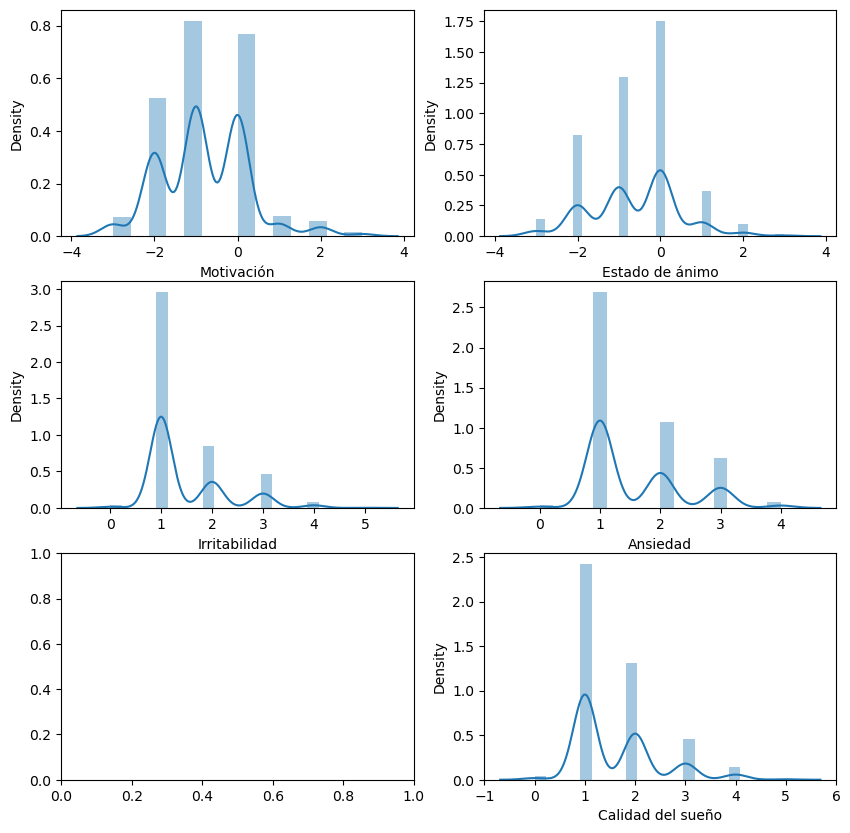

In [20]:
f, axes = plt.subplots(3, 2,figsize=(10,10))
sns_plot1 = sns.distplot(young['Motivación'],ax=axes[0,0])
sns_plot2 = sns.distplot(young['Estado de ánimo'],ax=axes[0,1])
sns_plot3 = sns.distplot(young['Irritabilidad'],ax=axes[1,0])
sns_plot4 = sns.distplot(young['Ansiedad'],ax=axes[1,1])
sns_plot5 = sns.distplot(young['Calidad del sueño'],ax=axes[2,1])





# Relación por pares de datos

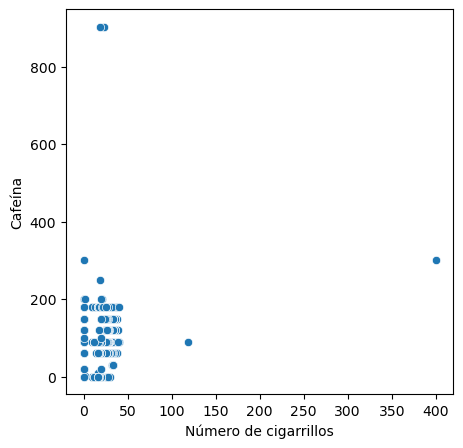

In [21]:
f, axes = plt.subplots(1, 1,figsize=(5,5))
a = sns.scatterplot(data=young,x='Número de cigarrillos',y='Cafeína')

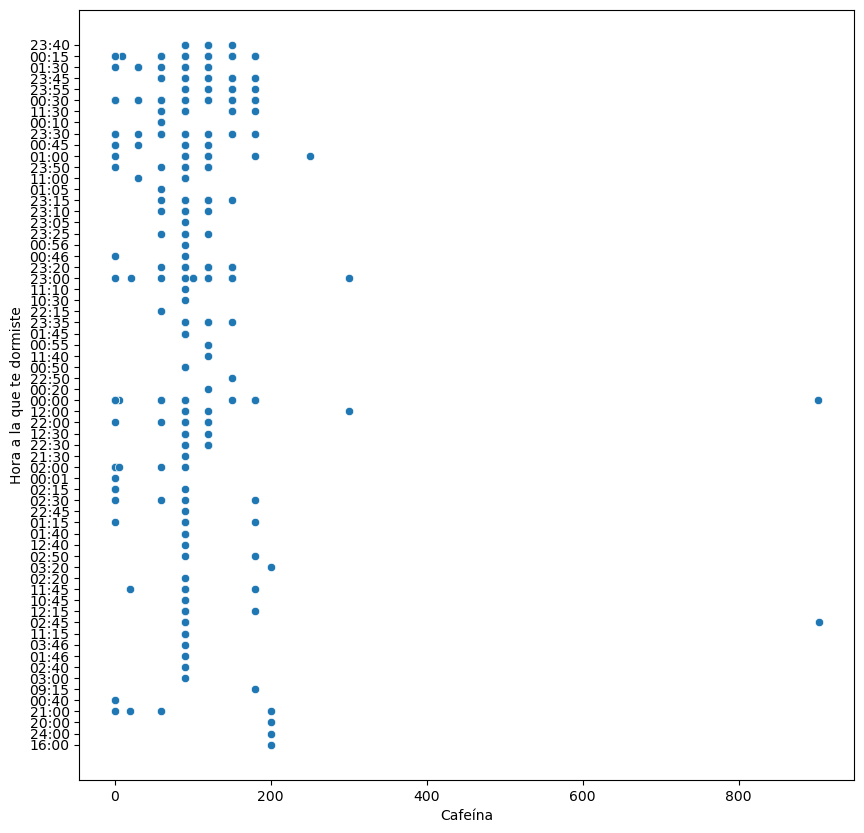

In [22]:
f, axes = plt.subplots(1, 1,figsize=(10,10))
a = sns.scatterplot(data=young,x='Cafeína',y='Hora a la que te dormiste')


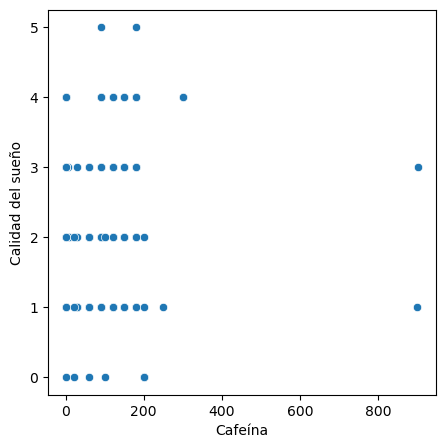

In [23]:
f, axes = plt.subplots(1, 1,figsize=(5,5))
a = sns.scatterplot(data=young,x='Cafeína',y='Calidad del sueño')

In [24]:
young1=young.drop(columns=["Código","Fecha","Hora de despertar","Hora a la que te dormiste"])

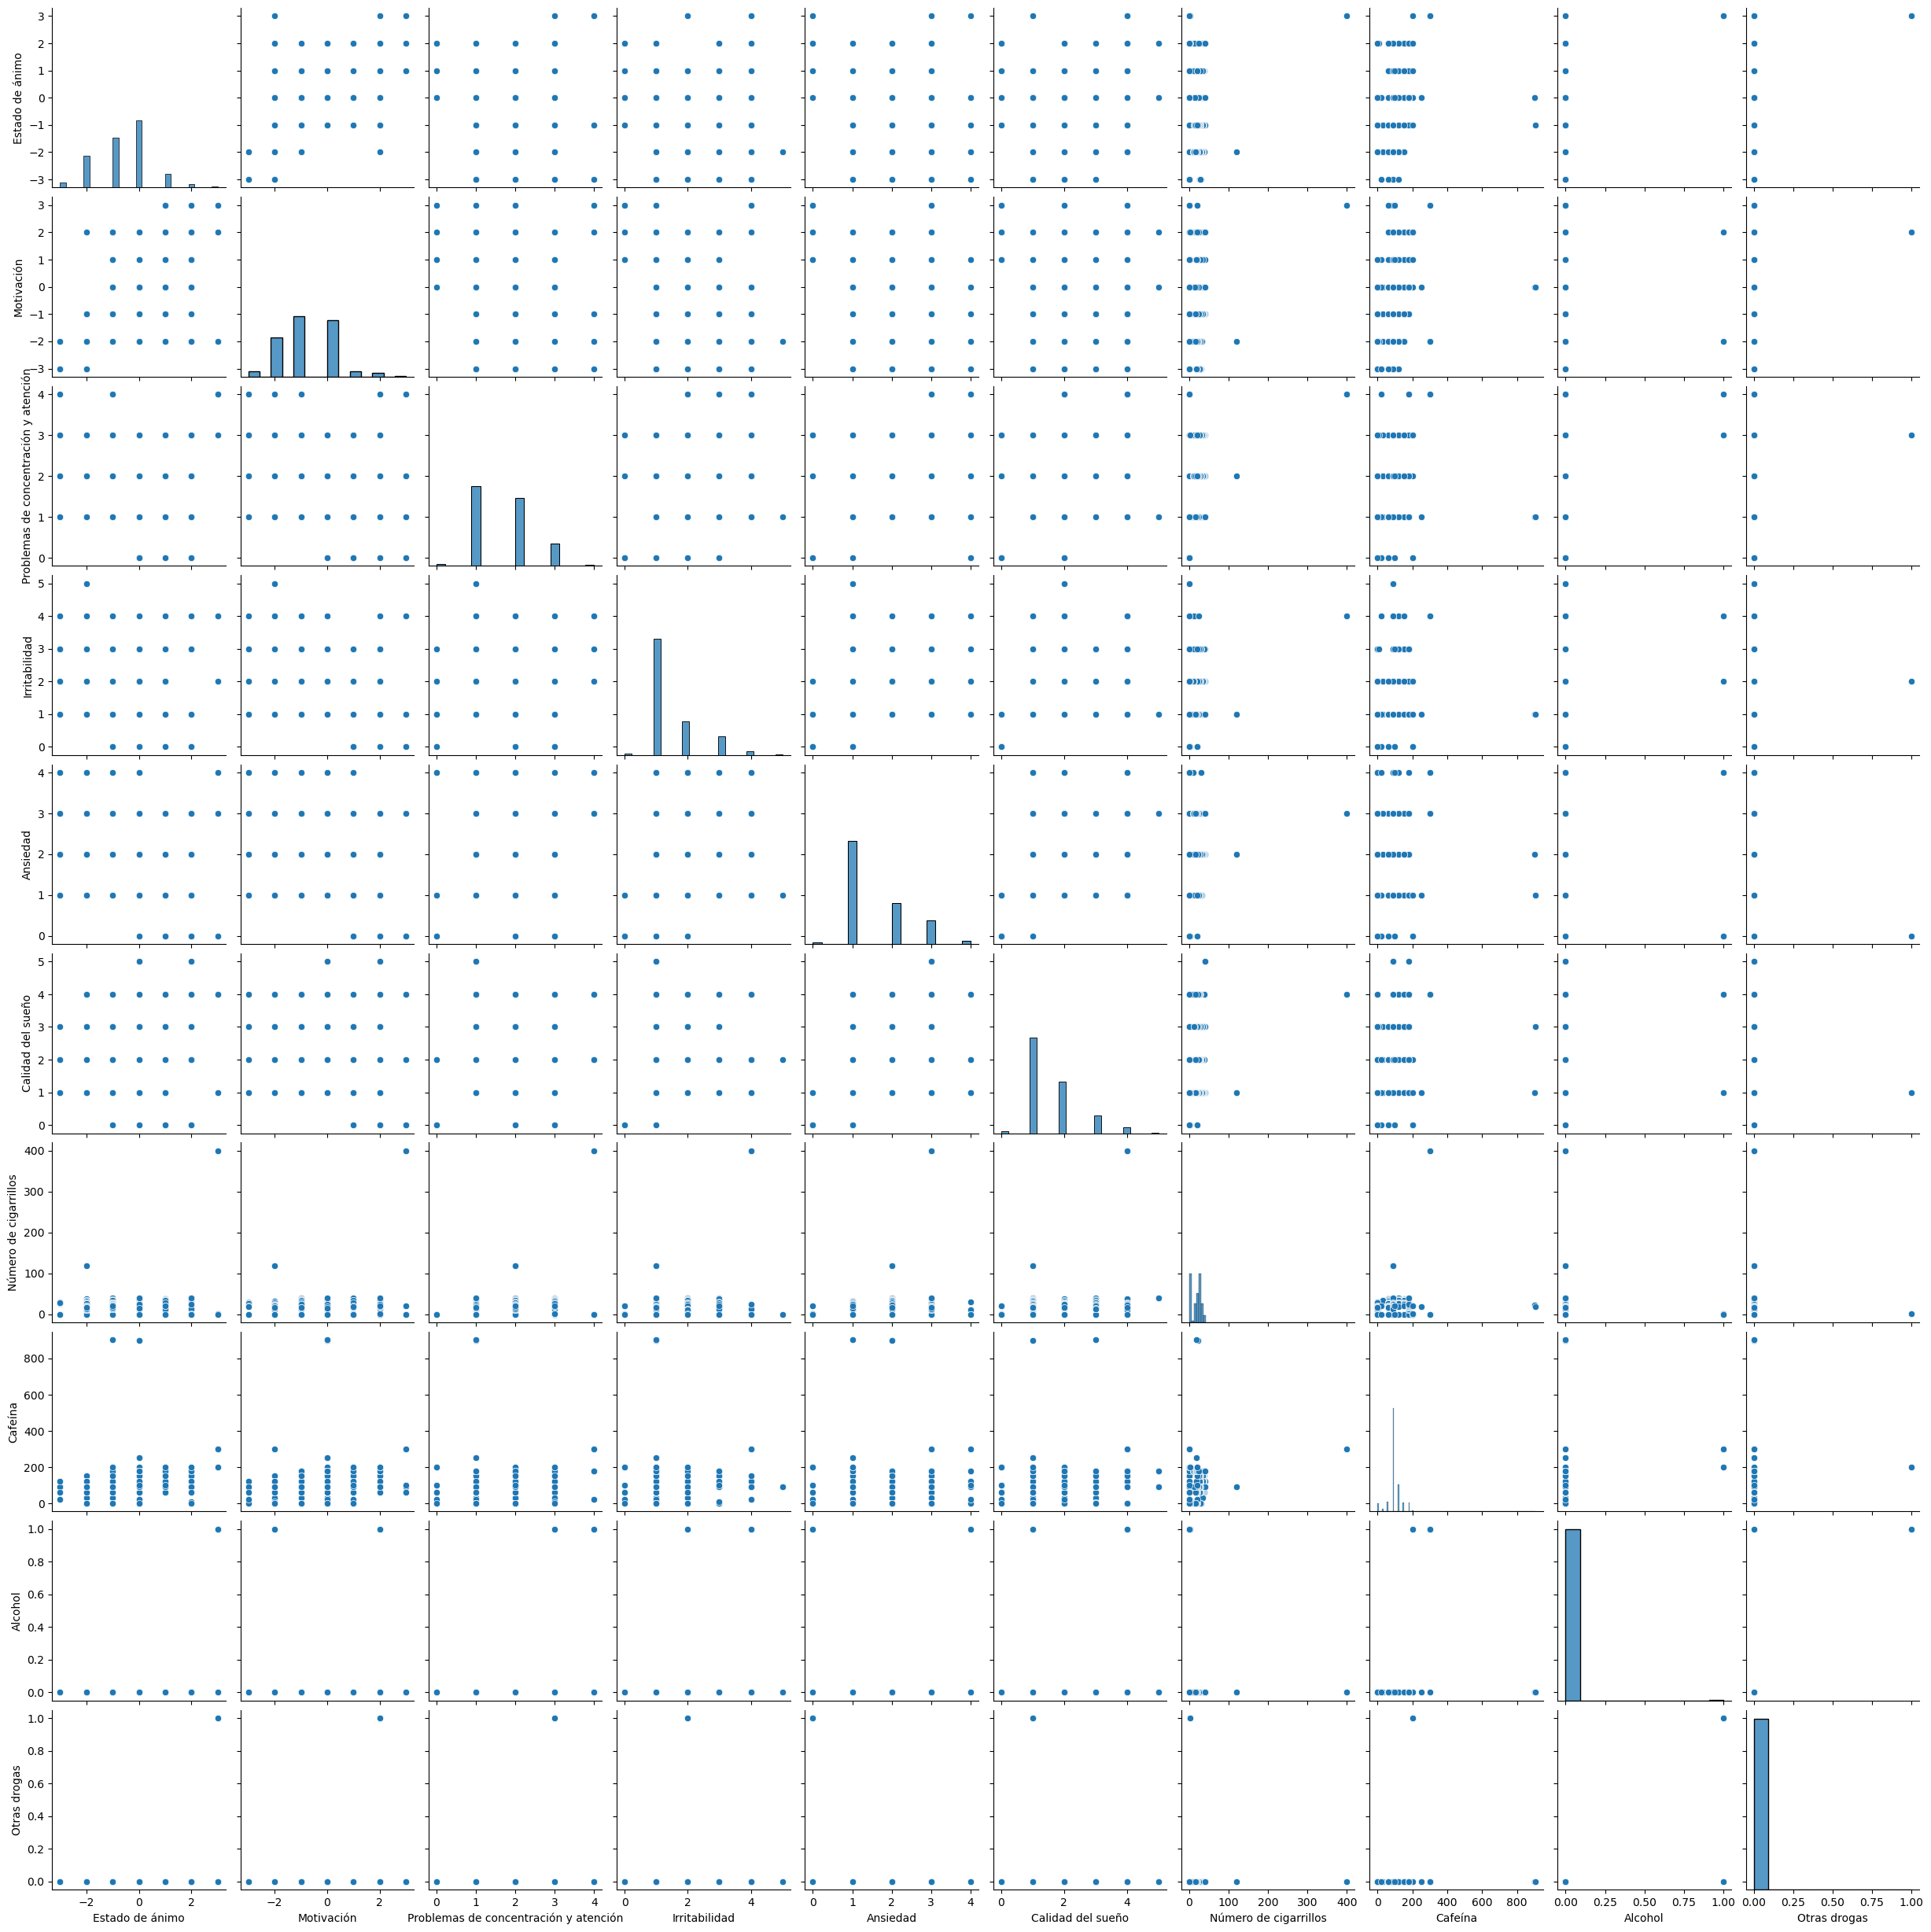

In [25]:
sns.pairplot(young1)

In [26]:
#Calculamos limites de la distribucion de cafeina hasta 3 desviaciones estandar
mean_cafeina = young.mean()[7]
std_cafeina = young.std()[7]
lim_inf_caf = mean_cafeina - 3*std_cafeina
lim_sup_caf = mean_cafeina + 3*std_cafeina

#Calculamos limites de la distribución de cigarrillos hasta 3 desviaciones estandar
mean_cigarrillo=young.mean()[6]
std_cigarrillo=young.std()[6]
lim_inf_cig=mean_cigarrillo-3*std_cigarrillo
lim_sup_cig=mean_cigarrillo+3*std_cigarrillo

/tmp/ipykernel_18177/3230516112.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_cafeina = young.mean()[7]
/tmp/ipykernel_18177/3230516112.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_cafeina = young.std()[7]
/tmp/ipykernel_18177/3230516112.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warn

/tmp/ipykernel_18177/4119311237.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  young.corr(),


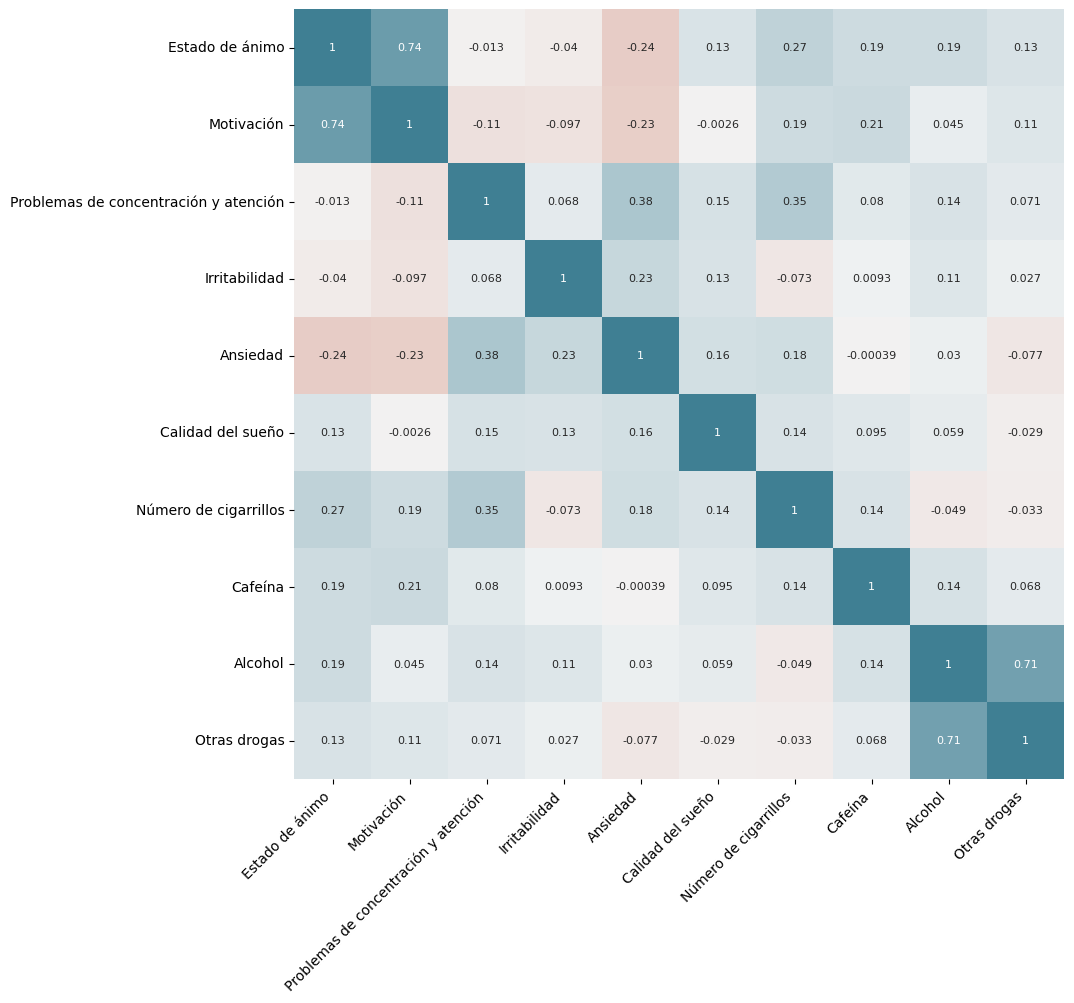

In [27]:
#Mapa de correlatividad con valores atipicos incluidos


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

b=sns.heatmap(
    young.corr(),
    annot= True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)






In [28]:
# limito el dataset eliminando los valores atipicos
young_trimmed=young[(young["Cafeína"]>=lim_inf_caf)&(young["Cafeína"]<=lim_sup_caf)&(young["Número de cigarrillos"]>=lim_inf_cig)&(young["Número de cigarrillos"]<=lim_sup_cig)]


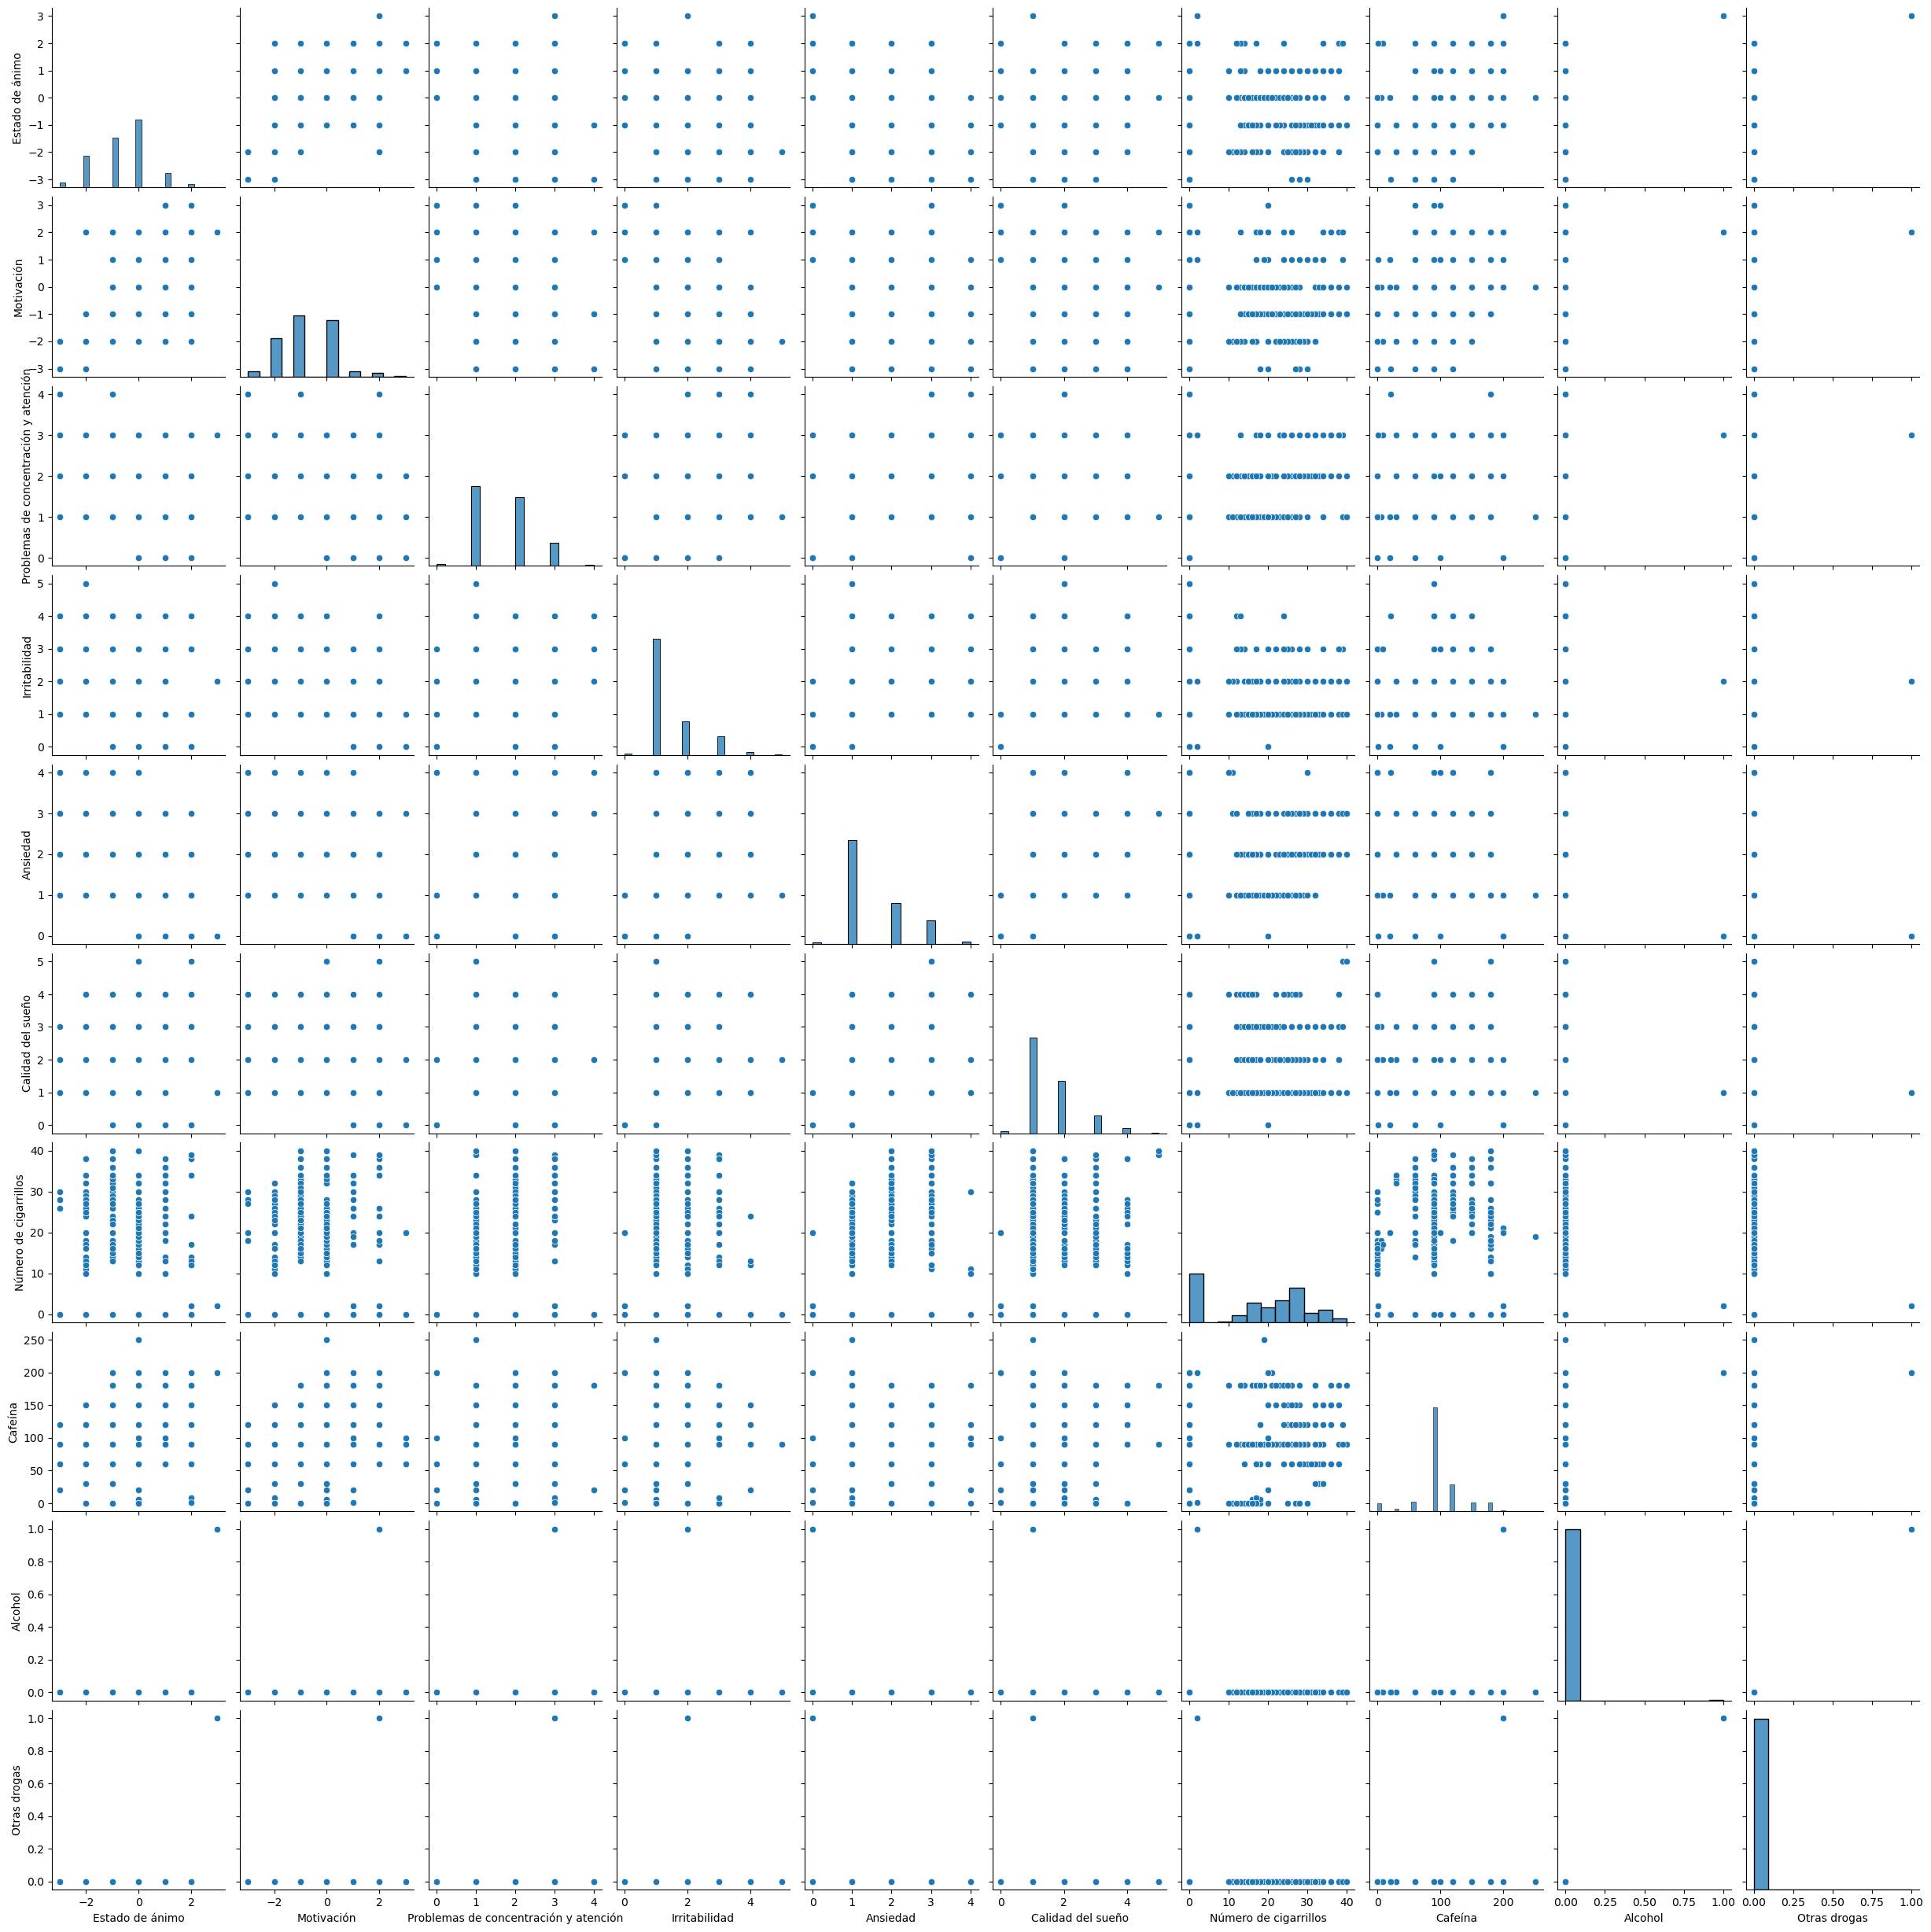

In [29]:
sns.pairplot(young_trimmed)

/tmp/ipykernel_18177/655300178.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  young_trimmed.corr(),


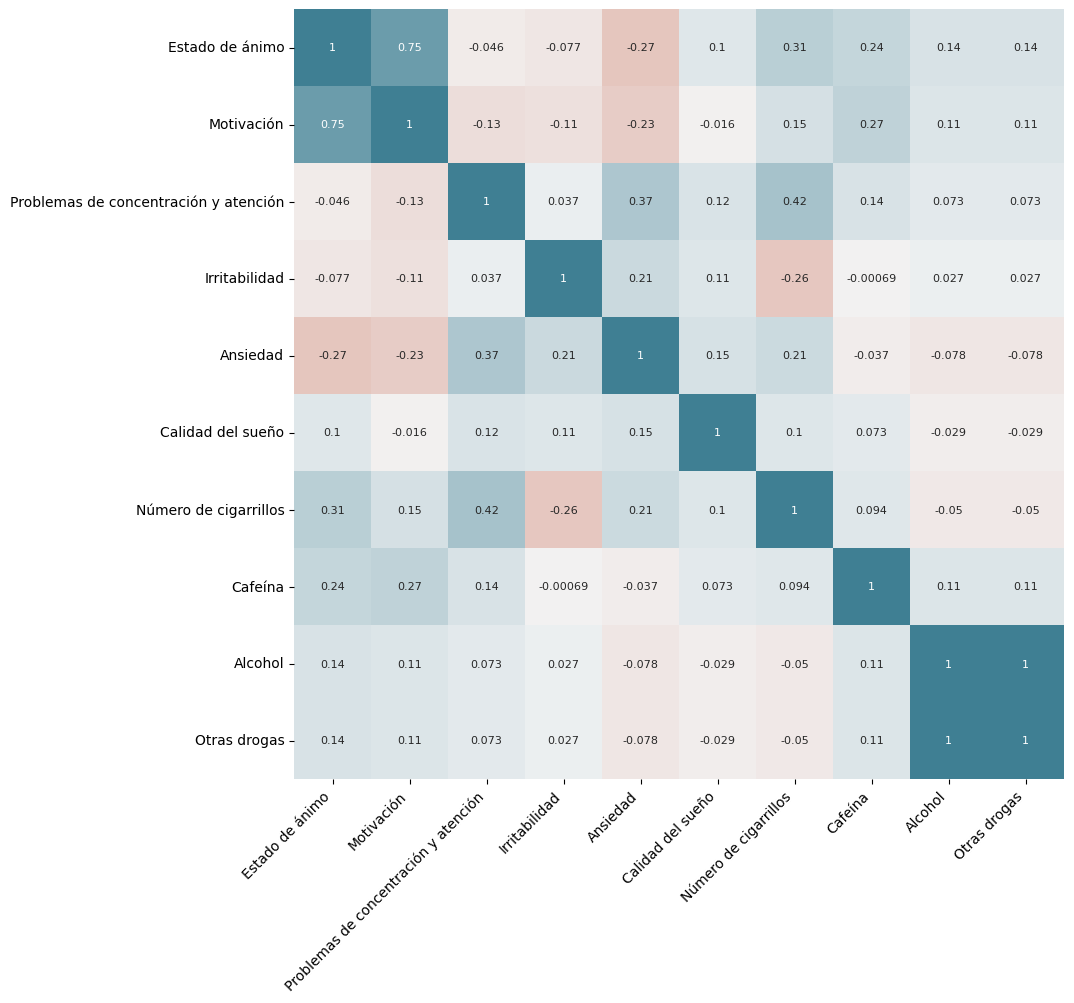

In [30]:
#Mapa de correlatividad utilizando el método de eliminación (trimming)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

b=sns.heatmap(
    young_trimmed.corr(),
    annot= True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Conclusiones:
Correlatividades:

Fuertes:
Alcohol-Drogas
Motivación-Estado de ánimo
         
Moderadas: 
Problemas de Atencion-Cigarrillos

Debiles:
Calidad de sueño- Irritabilidad

Cigarrillos- Ansiedad
         
Motivación-Cafeína
         
Cafeína-Alcohol
         
Cigarrillo-Animo



Se modificaron valores de correlatividades eliminando valores outliers
         
           

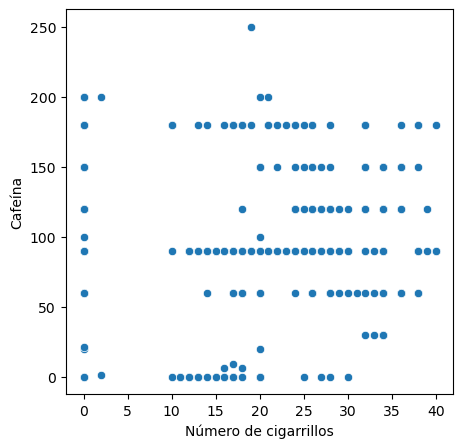

In [31]:
f, axes = plt.subplots(1, 1,figsize=(5,5))
a = sns.scatterplot(data=young_trimmed,x='Número de cigarrillos',y='Cafeína')